# Supervised Learning

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

Supervised learning can be classified into two categories: regression and classification.

ML models with greater flexibility can overfit the training dataset but fail to generalize on the test dataset.

In [4]:
X, y = mglearn.datasets.make_forge()

X.shape:(26, 2)


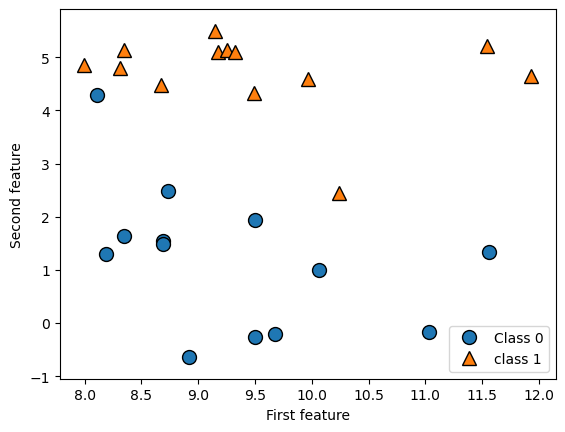

In [8]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print(f'X.shape:{X.shape}')

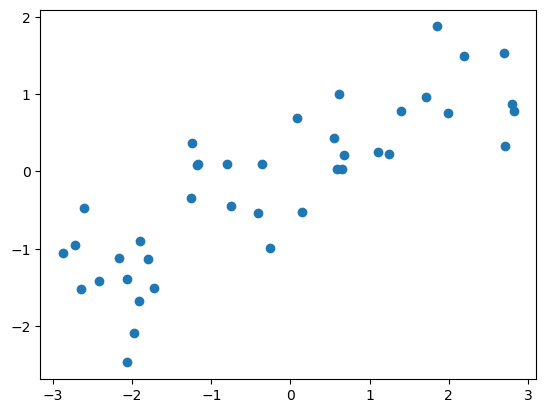

In [10]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')

In [11]:
from sklearn.datasets import load_breast_cancer

In [12]:
cancer = load_breast_cancer()
print(f'cancer.keys(): \n{cancer.keys()}')

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [13]:
cancer.data.shape

(569, 30)

In [17]:
{
    n: v 
    for n, v in zip(cancer.target_names, np.bincount(cancer.target))
}

{'malignant': 212, 'benign': 357}

In [18]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [21]:
np.bincount(np.random.randint(0, 3, 1100))

array([365, 360, 375])

In [22]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

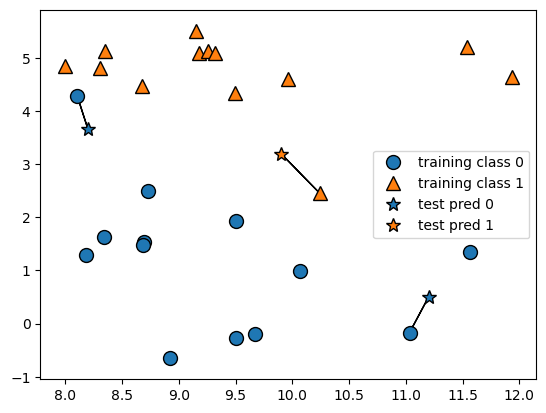

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

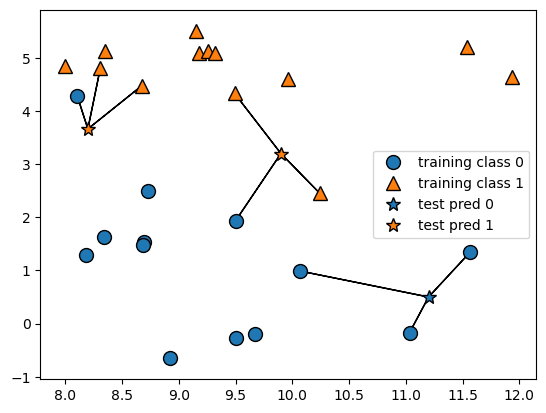

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [25]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
clf = KNeighborsClassifier(n_neighbors=3)

In [29]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [31]:
clf.score(X_test, y_test)

0.8571428571428571

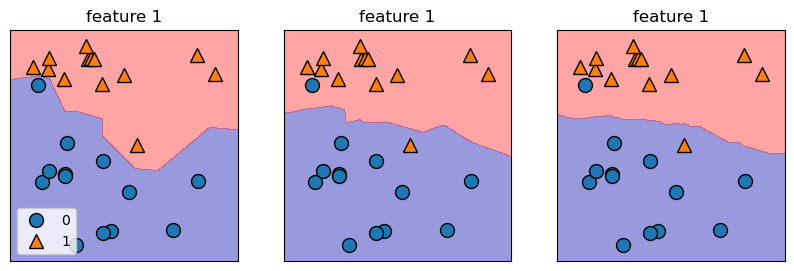

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'{n_neighbors} neighbor(s)')
    ax.set_title(f'feature 0')
    ax.set_title(f'feature 1')
axes[0].legend(loc=3)

In [33]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [34]:
training_accuracy = []
test_accuracy = []

In [35]:
neighbors_settings = range(1, 11)

In [37]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

In [38]:
training_accuracy

[1.0,
 0.9765258215962441,
 0.9577464788732394,
 0.9553990610328639,
 0.9483568075117371,
 0.9460093896713615,
 0.9436619718309859,
 0.9413145539906104,
 0.9342723004694836,
 0.9389671361502347]

In [39]:
test_accuracy

[0.9020979020979021,
 0.8881118881118881,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9370629370629371,
 0.9300699300699301,
 0.9300699300699301,
 0.916083916083916,
 0.916083916083916]

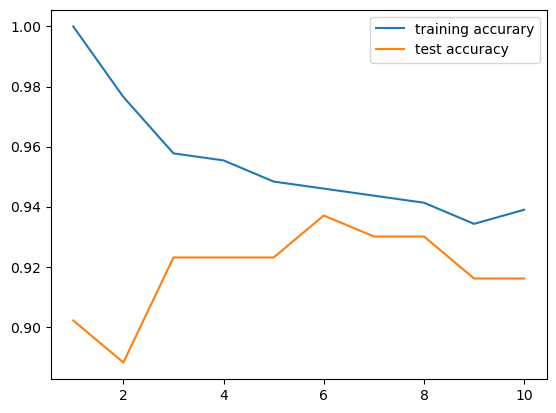

In [40]:
plt.plot(neighbors_settings, training_accuracy, label='training accurary')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.legend()

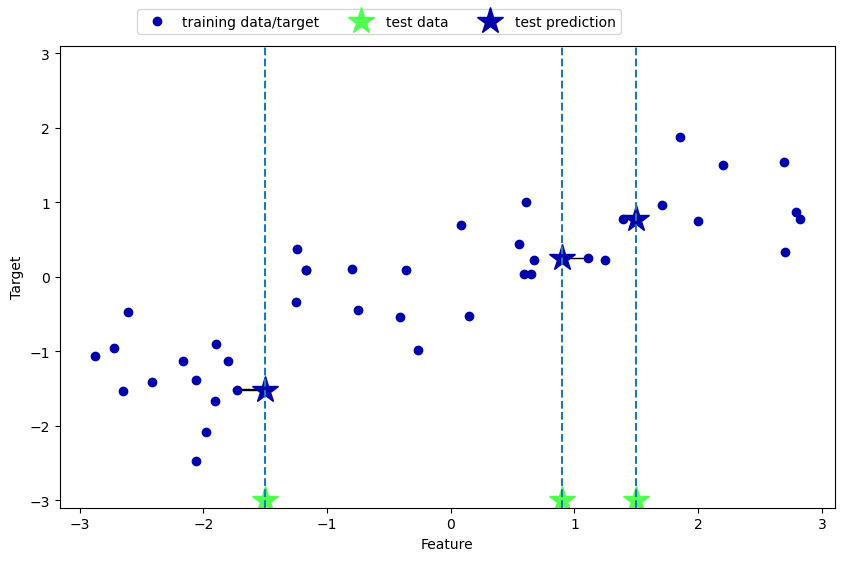

In [41]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

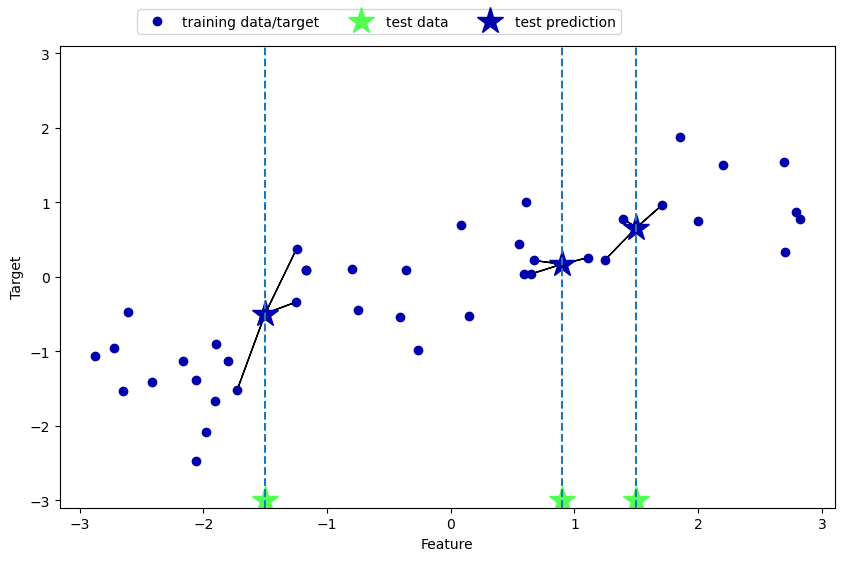

In [42]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [43]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [45]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [46]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [47]:
reg.score(X_test, y_test)

0.8344172446249606

In [48]:
reg.score(X_train, y_train)

0.8194343929538755

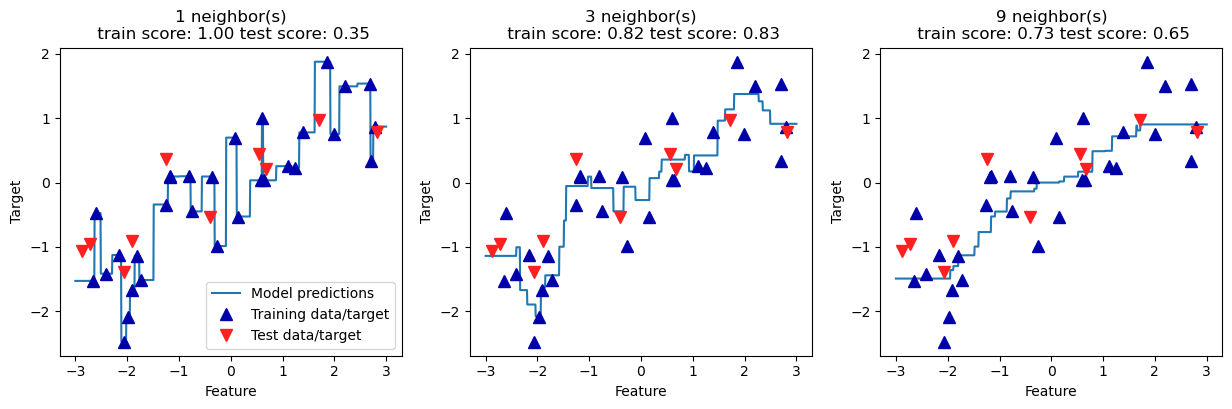

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3 
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
        # make predictions using 1, 3, or 9 neighbors
        reg = KNeighborsRegressor(n_neighbors=n_neighbors)
        reg.fit(X_train, y_train)
        ax.plot(line, reg.predict(line))
        ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
        ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
        ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
                        n_neighbors, reg.score(X_train, y_train),
                        reg.score(X_test, y_test)))
        ax.set_xlabel("Feature")
        ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                    "Test data/target"], loc="best")

w[0]: 0.393906  b: -0.031804


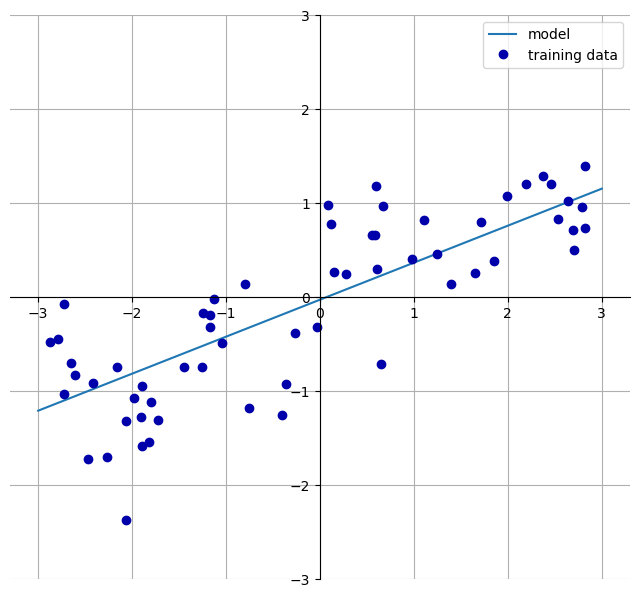

In [54]:
mglearn.plots.plot_linear_regression_wave()

In [55]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [58]:
lr = LinearRegression().fit(X_train, y_train)

In [59]:
lr.coef_

array([0.39390555])

In [60]:
lr.intercept_

-0.031804343026759704

In [61]:
lr.score(X_train, y_train)

0.6700890315075756

In [62]:
lr.score(X_test, y_test)

0.6593368596863702

In [63]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [64]:
lr = LinearRegression().fit(X_train, y_train)

In [65]:
lr.score(X_train, y_train)

0.9520519609032729

In [66]:
lr.score(X_test, y_test)

0.6074721959666055

## Ridge Regression

In [67]:
from sklearn.linear_model import Ridge

In [68]:
ridge = Ridge().fit(X_train, y_train)

In [69]:
ridge.score(X_train, y_train)

0.8857966585170942

In [70]:
ridge.score(X_test, y_test)

0.7527683481744758

In [71]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge10.score(X_train, y_train)
ridge10.score(X_test, y_test)

0.6359411489177313

In [72]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f'training set score: {ridge01.score(X_train, y_train)}')
print(f'test set score: {ridge01.score(X_test, y_test)}')

training set score: 0.9282273685001989
test set score: 0.7722067936480158


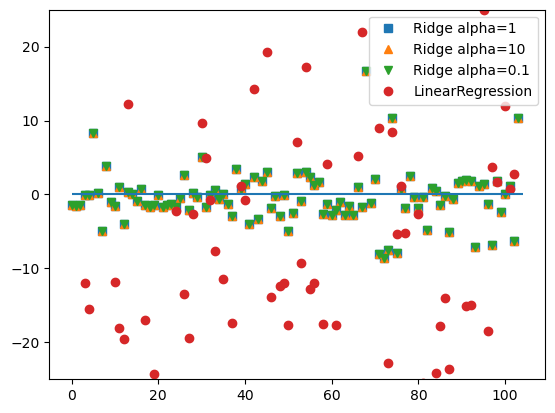

In [75]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

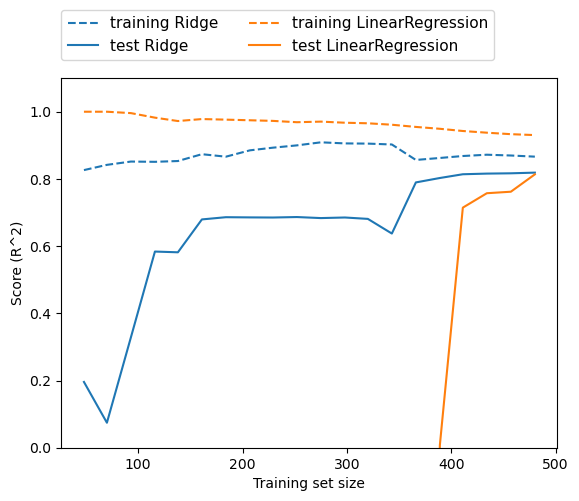

In [77]:
mglearn.plots.plot_ridge_n_samples()

### Lasso

In [78]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(f'training set score: {lasso.score(X_train, y_train)}')
print(f'test set score: {lasso.score(X_test, y_test)}')
print(f'number of features used; {np.sum(lasso.coef_ != 0)}')

training set score: 0.29323768991114607
test set score: 0.20937503255272294
number of features used; 4


In [79]:
lasso001 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print(f'training set score: {lasso001.score(X_train, y_train)}')
print(f'test set score: {lasso001.score(X_test, y_test)}')
print(f'number of features used: {np.sum(lasso001.coef_ != 0)}')

training set score: 0.7709955157630054
test set score: 0.630200997611004
number of features used: 8


In [81]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

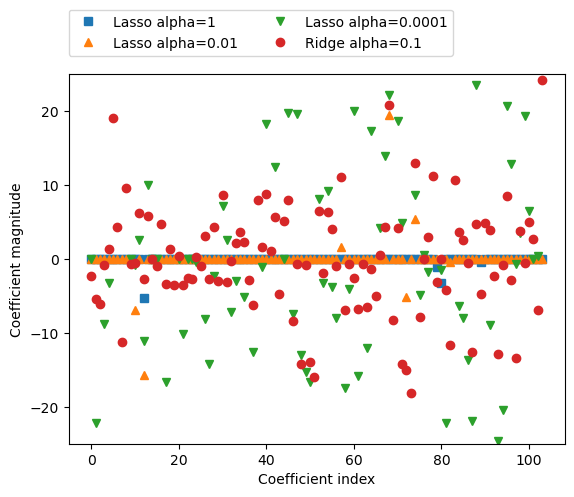

In [82]:
 plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

/opt/homebrew/anaconda3/envs/mlintro/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/homebrew/anaconda3/envs/mlintro/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


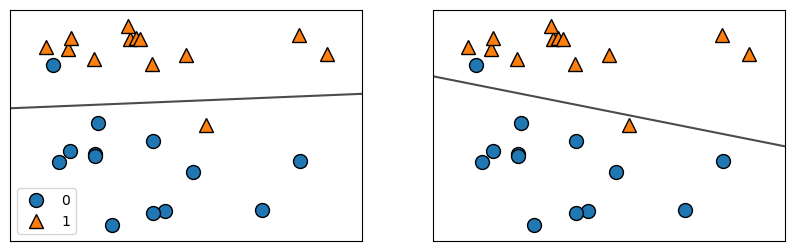

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=0.7)

    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

axes[0].legend()

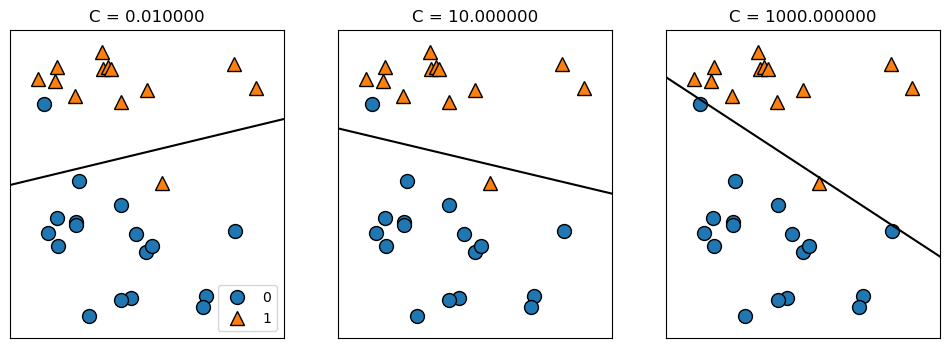

In [85]:
mglearn.plots.plot_linear_svc_regularization()

In [86]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [87]:
logreg = LogisticRegression().fit(X_train, y_train)

/opt/homebrew/anaconda3/envs/mlintro/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
print(f'training set score: {logreg.score(X_train, y_train)}')

training set score: 0.9436619718309859


In [89]:
print(f'test set score: {logreg.score(X_test, y_test)}')

test set score: 0.951048951048951


In [90]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print(f'training set score: {logreg100.score(X_train, y_train)}')
print(f'test set score: {logreg100.score(X_test, y_test)}')

training set score: 0.9460093896713615
test set score: 0.951048951048951


/opt/homebrew/anaconda3/envs/mlintro/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print(f'training set score: {logreg001.score(X_train, y_train)}')
print(f'test set score: {logreg001.score(X_test, y_test)}')

training set score: 0.9342723004694836
test set score: 0.9300699300699301


/opt/homebrew/anaconda3/envs/mlintro/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


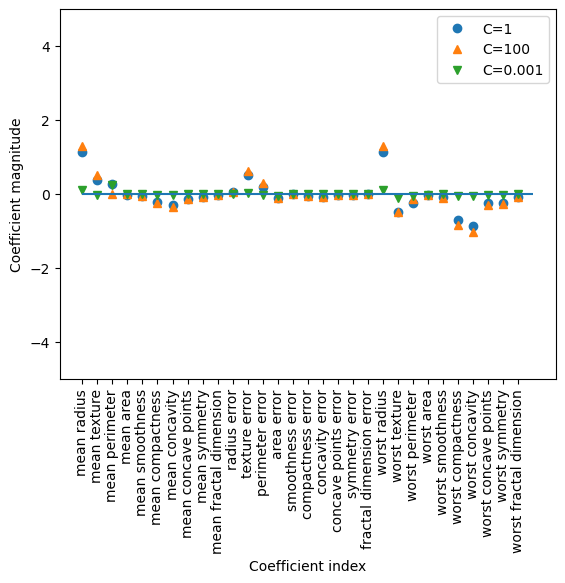

In [92]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [ ]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train) 
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

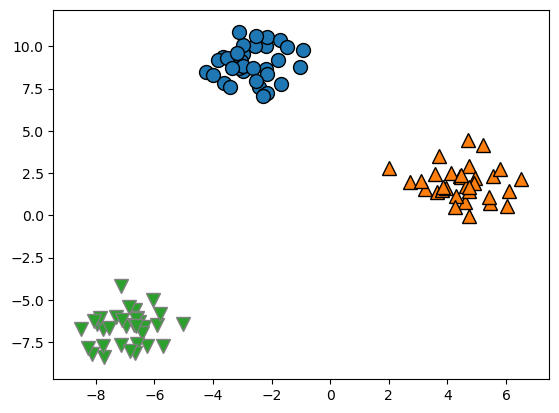

In [98]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)

In [99]:
linear_svc = LinearSVC().fit(X, y)
print(f'coefficient shape: {linear_svc.coef_.shape}')

coefficient shape: (3, 2)


/opt/homebrew/anaconda3/envs/mlintro/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


## Naive Bayes Classifiers

In [100]:
X = np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 0, 0, 1],
    [1, 0, 1, 0]
])
y = np.array([0, 1, 0, 1])

## Decision Trees

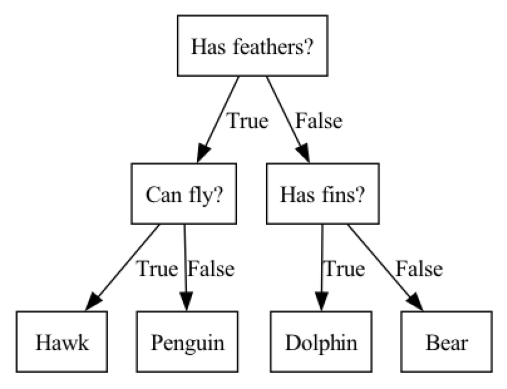

In [101]:
mglearn.plots.plot_animal_tree()

In [102]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42)

In [103]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [105]:
print(f'training set accuracy: {tree.score(X_train, y_train)}')
print(f'test set accurary: {tree.score(X_test, y_test)}')

training set accuracy: 1.0
test set accurary: 0.9370629370629371


In [106]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [107]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

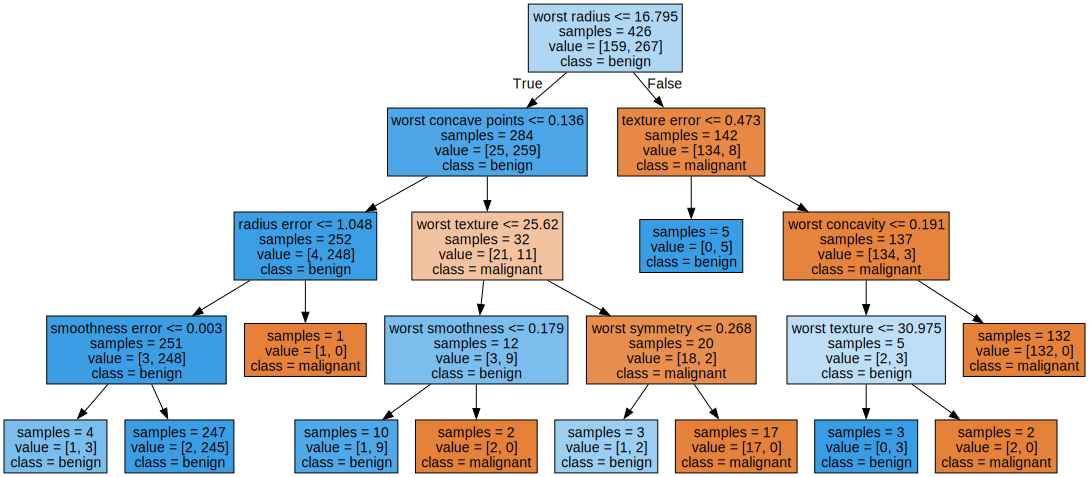

In [110]:
import graphviz
with open("tree.dot") as f: 
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [111]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

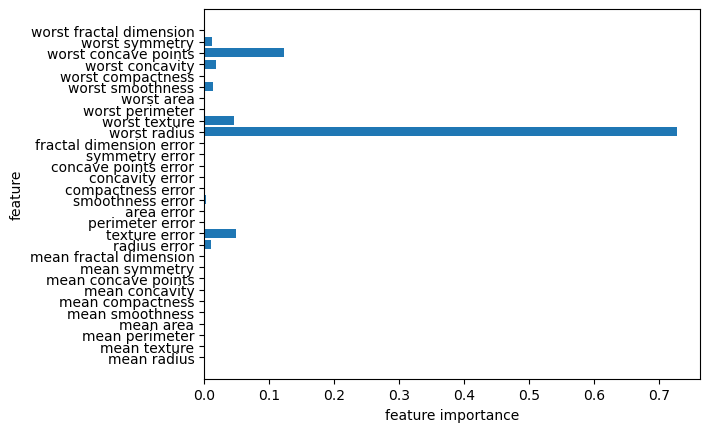

In [112]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('feature')

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


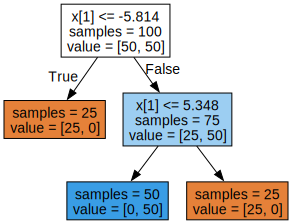

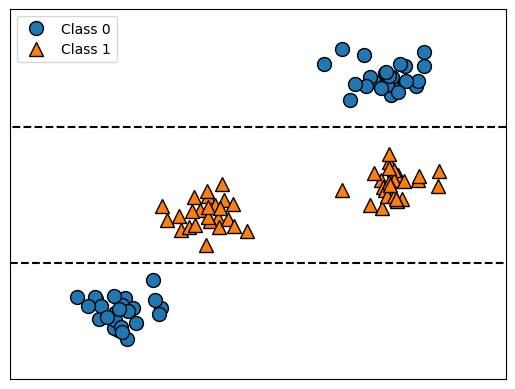

In [113]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [114]:
ram_prices = pd.read_csv('data/ram_prices.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/ram_prices.csv'

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [116]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [117]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

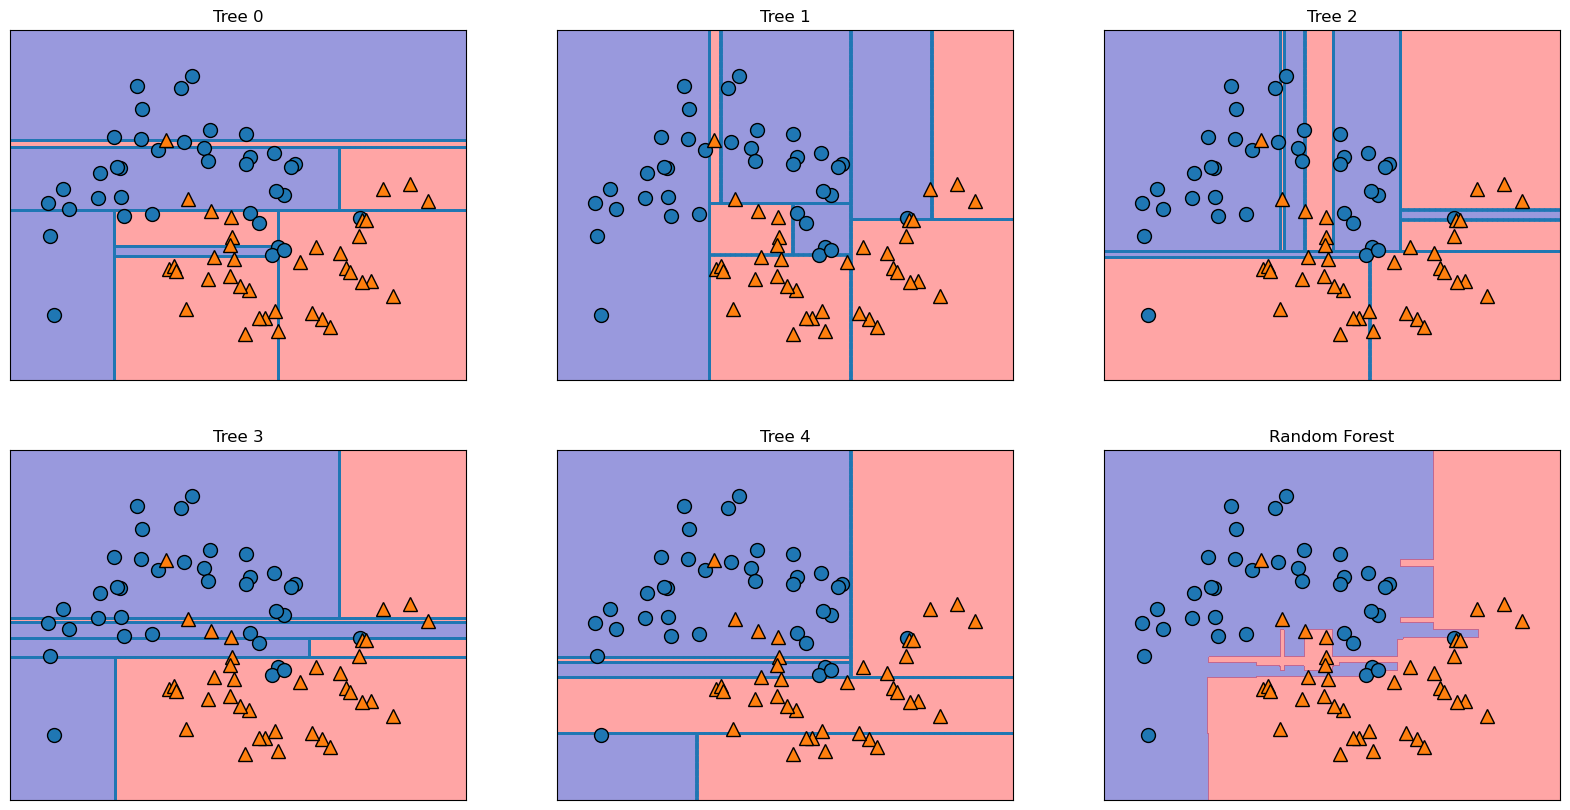

In [118]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
        ax.set_title("Tree {}".format(i))
        mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                    alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.972


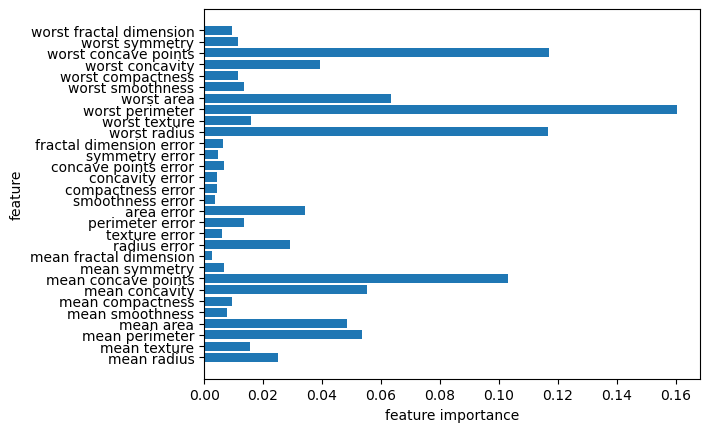

In [121]:
plot_feature_importances_cancer(forest)

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [123]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [125]:
print(f'training set accuracy: {gbrt.score(X_train, y_train)}')
print(f'test set accurary: {gbrt.score(X_test, y_test)}')

training set accuracy: 1.0
test set accurary: 0.965034965034965


In [126]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972
